In [51]:
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [53]:
df=pd.read_csv('./stroke data.csv')

In [8]:
df.head(101)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [9]:
df.shape

(5110, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.describe(include=['O'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [14]:
#check for duplicates
df.duplicated().sum()

0

In [15]:
# check for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:

#column names
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:
#Gender
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

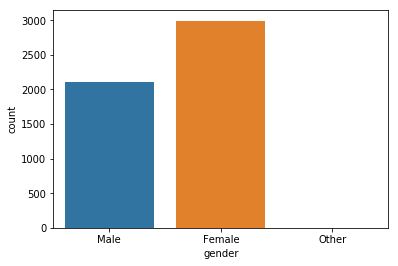

In [18]:
sns.countplot(df['gender'])
df['gender'].value_counts()

In [20]:
#more females in our sample data than males

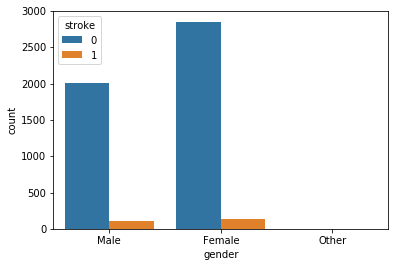

In [21]:
sns.countplot(df['gender'],hue=df['stroke'])

In [22]:
#Seems that number of male and female who has stroke are almost equa

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


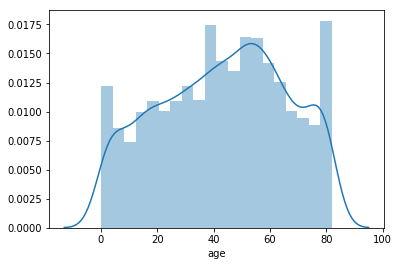

In [23]:
sns.distplot(df['age'])

In [24]:
#the most of ages between 40-60 years

In [25]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

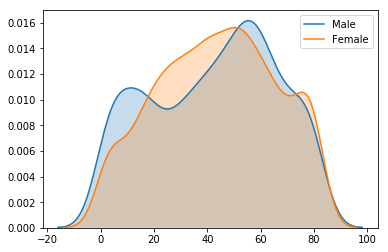

In [26]:
# age vs. gender
df2 = df[df.age.notnull()] 
sns.kdeplot(df2[df2.gender == 'Male'].age, shade=True, label='Male')
sns.kdeplot(df2[df2.gender == 'Female'].age, shade=True, label='Female')

plt.legend()

In [27]:
#the ages seem to be normally distributed

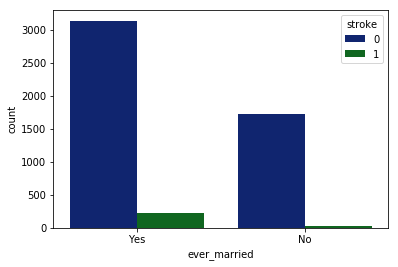

In [28]:
#ever married
sns.countplot(df['ever_married'],hue=df['stroke'],palette= "dark")

In [ ]:
#Being unmarried reduces your risk of a stroke

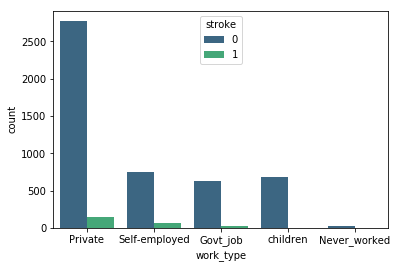

In [29]:
#work type
sns.countplot(df['work_type'],hue=df['stroke'],palette='viridis')

In [ ]:
#Private work exposes you to more stroke, and over all private work is the 
most in our sample data

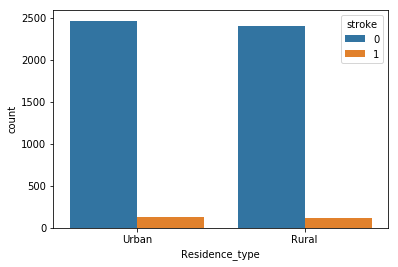

In [30]:
#residence type
sns.countplot(df['Residence_type'],hue=df['stroke'])

In [ ]:
#we can see Residence_type has almost no effect on our sample
data to be stroke or not

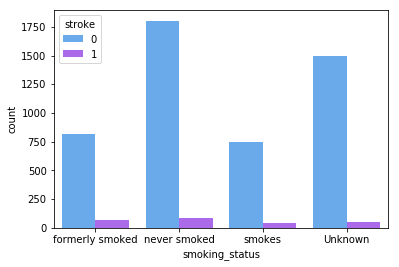

In [31]:
#smoking status
sns.countplot(df['smoking_status'],hue=df['stroke'],palette='cool')

In [ ]:
#Surprisingly!
#the samples have never smoked are the most to have a stroke.
#and the smallest proportion of the stroke postive samples are smokes
#but, People who formerly smoked and who smokes (combined) are 
showing signs of stroke way more than people who never smoked

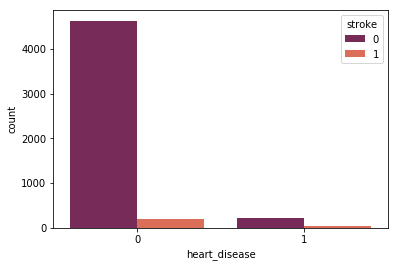

In [32]:
#Heart Disease
sns.countplot(df['heart_disease'],hue=df['stroke'],palette='rocket')

In [ ]:
#we can see most people who have had a stroke do not have any heart disease
but that does not prevent it being an influential factor, coz we have a 
small sample of people that had heart disease and due to the fact that
our data is imbalanced.

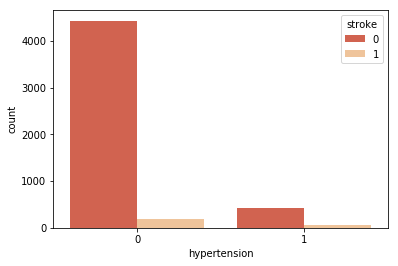

In [33]:
#Hyper Tension
sns.countplot(df['hypertension'],hue=df['stroke'],palette='OrRd_r')

In [ ]:
we can see most people who have had a stroke do not have hypertension, but 
it dosen't prevent it being an influential factor
due to the fact that our data is imbalanced too

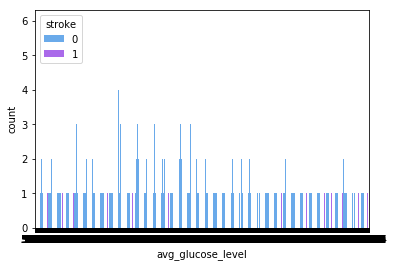

In [34]:
#Avg Glucose level
sns.countplot(df['avg_glucose_level'],hue=df['stroke'],palette='cool')

In [ ]:
#The avg_glucose_level is heavily skewed towards right and most of the 
distribution is between 50-150.
but we can see also people with less than 150 glucose levels are less prone to
strokes than people with glucose levels more than 150 level.

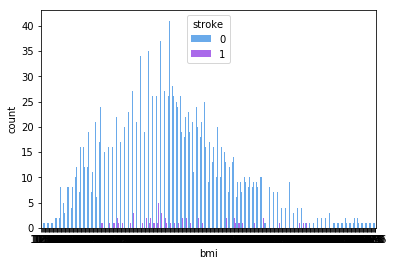

In [35]:
#BMI
sns.countplot(df['bmi'],hue=df['stroke'],palette='cool')

In [36]:
#Pre-Processing
df=df.drop(columns='id',axis=1)

In [37]:
#Encoding categorical features
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

In [38]:
df.head(101)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
6,1,74.0,1,1,1,Private,0,70.09,27.4,never smoked,1
7,0,69.0,0,0,0,Private,1,94.39,22.8,never smoked,1
8,0,59.0,0,0,1,Private,0,76.15,NaN,Unknown,1
9,0,78.0,0,0,1,Private,1,58.57,24.2,Unknown,1


In [39]:
# hot encoding to features are not binary

df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [41]:
df.head(101)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,NaN,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,0,1,0,0
6,1,74.0,1,1,1,0,70.09,27.4,1,0,0,1,0,0,0,1,0,0
7,0,69.0,0,0,0,1,94.39,22.8,1,0,0,1,0,0,0,1,0,0
8,0,59.0,0,0,1,0,76.15,NaN,1,1,0,0,0,0,0,1,0,0
9,0,78.0,0,0,1,1,58.57,24.2,1,1,0,0,0,0,0,1,0,0


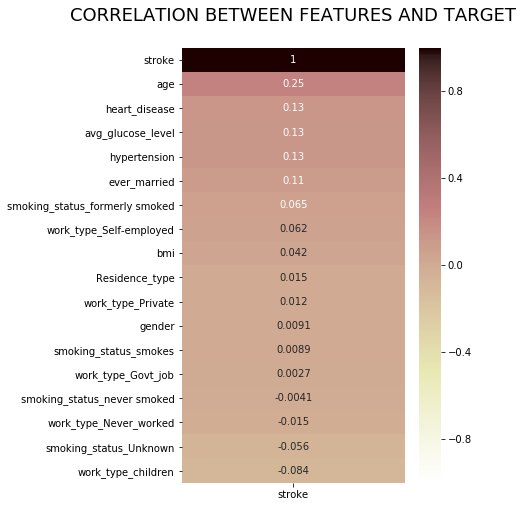

In [42]:
# let's see correlation with our target
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(
    by='stroke',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET\n', loc='center', fontsize=18);
plt.show()


In [ ]:
we can see age has the highest correlation with our target

In [43]:
#Handling missing values
df.isnull().sum()

gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
dtype: int64

In [44]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [142]:
#distribution is almost normally distributed

In [144]:
choices = np.arange(min(df['bmi']),max(df['bmi']))
choices

array([10.3, 11.3, 12.3, 13.3, 14.3, 15.3, 16.3, 17.3, 18.3, 19.3, 20.3,
       21.3, 22.3, 23.3, 24.3, 25.3, 26.3, 27.3, 28.3, 29.3, 30.3, 31.3,
       32.3, 33.3, 34.3, 35.3, 36.3, 37.3, 38.3, 39.3, 40.3, 41.3, 42.3,
       43.3, 44.3, 45.3, 46.3, 47.3, 48.3, 49.3, 50.3, 51.3, 52.3, 53.3,
       54.3, 55.3, 56.3, 57.3, 58.3, 59.3, 60.3, 61.3, 62.3, 63.3, 64.3,
       65.3, 66.3, 67.3, 68.3, 69.3, 70.3, 71.3, 72.3, 73.3, 74.3, 75.3,
       76.3, 77.3, 78.3, 79.3, 80.3, 81.3, 82.3, 83.3, 84.3, 85.3, 86.3,
       87.3, 88.3, 89.3, 90.3, 91.3, 92.3, 93.3, 94.3, 95.3, 96.3, 97.3])

In [136]:
#let's fill with random choice
df['bmi'] = df['bmi'].apply(lambda x: np.random.choice(choices) if (np.isnan(x)) else x)

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


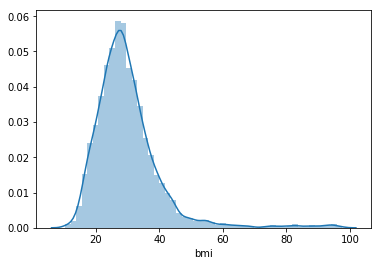

In [137]:
sns.distplot(df['bmi'])

In [ ]:
distribution is almost the same

In [139]:
df.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
dtype: int64

In [145]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,67.0,0,1,0,0,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,0,0,202.21,34.3,1,0,0,1,0,0,0,0,1,0
2,0,80.0,0,1,0,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,0,0,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,0,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression

In [47]:
def XYsplit(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    return X,y

In [49]:
X,y = XYsplit(df,'stroke')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [50]:
predictions = LogReg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)*100
precision = precision_score(y_test, predictions,pos_label=1,labels=[0,1])*100
recall = recall_score(y_test, predictions,pos_label=1,labels=[0,1])*100
fpr , tpr, _ = roc_curve(y_test, predictions)
auc_val = auc(fpr, tpr)
f_score = f1_score(y_test, predictions)
print("Accuracy: \n", accuracy)
print("Precision of event Happening: \n", precision)
print("Recall of event Happening: \n", recall)
print("AUC: \n",auc_val)
print("F-Score:\n", f_score)
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_val))
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet